<a href="https://colab.research.google.com/github/akshithamaddi/Akshitha_INFO5731_Spring2020/blob/master/Extracting_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install textblob
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import word_tokenize, pos_tag, pos_tag_sents
from textblob import Word
from nltk.stem import PorterStemmer

nltk.download('stopwords')
st=PorterStemmer()
stop=stopwords.words('english')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [0]:
#Extracting the article information from all the json files.
import json
import pandas
from pandas import DataFrame
topicListString = ""
Venuelist = []
Titlelist = []
Yearlist = []
Abstractlist = []
Doilist = []
FieldsOfStudylist = []
Topiclist = []
urllist = []
influentialCitationCountlist = []
totalcitationcountlist = []
#articleidlist = []
#pdfdownloadlist = []
for i in range(968):
  topicListString = ""
  f = open('/content/jsonfiles/Article' + str(i) + '.json')
  data = json.load(f)
  venue = data['venue']
  Venuelist.append(venue)
  title = data['title']
  Titlelist.append(title)
  year = data['year']
  Yearlist.append(year)
  abstract = data['abstract']
  Abstractlist.append(abstract)
  doi = data['doi']
  Doilist.append(doi)
  fieldsOfStudy = data['fieldsOfStudy']
  FieldsOfStudylist.append(fieldsOfStudy)
  influentialCitationCount = data['influentialCitationCount']
  influentialCitationCountlist.append(influentialCitationCount)
  totalcitationcount = len(data['citations'])
  totalcitationcountlist.append(totalcitationcount)
  for value in data['topics']:
    topic = value['topic']
    #Topiclist.append(topic)
    topicListString = topicListString + ","+ topic
  url = data['url']
  urllist.append(url)
  topicListString = topicListString[1:]
  Topiclist.append(topicListString)   
f.close()

In [0]:
#appending a string to article id and the pdf download link.
  articleidlist=[]
  pdfdownloadlist = []
  string = 'https://doi.org/'
  for item in Doilist:
    articleidlist.append(string+str(item))
string1 = 'https://dl.acm.org/doi/pdf/'
string2='?download=true' 
  for item in Doilist:
    pdfdownloadlist.append(string1+str(item)+string2)

In [0]:
#Cleaning the data and loading the data into a dataframe and csv files.
import pandas as pd
import glob
import pandas as pd
import os
import string

# Select all the files in your directory
fields = ["TotalDownloadCount"]
dfarticle = pd.read_csv("table1_akshitha.csv", usecols=fields)
#totalcitationlist = dfarticle['total_citation'].values.tolist()
totaldownloadlist = dfarticle['TotalDownloadCount'].values.tolist()
a = {'Article_id' : articleidlist ,'Venue' : Venuelist ,'Title' : Titlelist ,'Year' :Yearlist, 'Abstract': Abstractlist,
     'Doi' : Doilist,'fieldsOfStudy' : FieldsOfStudylist, 'topics': Topiclist , 'Downloadurl' : pdfdownloadlist,'TotalCitationCount' : totalcitationcountlist,
      'TotalDownloadCount' : totaldownloadlist,'Influentialcitationcount' : influentialCitationCountlist}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
df1["Abstract"]=df1["Abstract"].str.lower() 
df1['Abstract'] = df1['Abstract'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
df1["Abstract"]=df1['Abstract'].str.replace('[{}]'.format(string.punctuation), '')
df1['fieldsOfStudy'] = df1['fieldsOfStudy'].apply(str)
df1['fieldsOfStudy'] = df1['fieldsOfStudy'].str.replace('[{}]'.format(string.punctuation), '')
df1['fieldsOfStudy']
df1 = df1[pd.notnull(df1['Article_id'])]
df1.to_csv('/content/jsonfiles/table1.csv', columns = a)
df1

,Article_id,Venue,Title,Year,Abstract,Doi,fieldsOfStudy,topics,Downloadurl,TotalCitationCount,TotalDownloadCount,Influentialcitationcount
0,https://doi.org/10.1145/511285.511286,SIGIR '71,Introduction and perspectives for the 1971 ACM...,1971,introduction prospectives provided 1971 acm in...,10.1145/511285.511286,Computer Science,"Information retrieval,Document retrieval",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,0,222,0
1,https://doi.org/10.1145/511285.511288,SIGIR '71,The function of semantics in automated languag...,1971,paper survey major semantic models developed a...,10.1145/511285.511288,Computer Science,"SIMMON,Semantic analysis (compilers),Lexicon,N...",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,6,728,0
2,https://doi.org/10.1145/511285.511289,SIGIR '71,How features resolve syntactic ambiguity,1971,ambiguity pervasive important aspect natural l...,10.1145/511285.511289,Computer Science,"Natural language,Formal language,Parsing,Softw...",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,4,280,0
3,https://doi.org/10.1145/511285.511290,SIGIR '71,The converse natural language data management ...,1971,paper presents overview research progress prin...,10.1145/511285.511290,Computer Science,"Database,Natural language,Management system,Co...",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,10,256,0
4,https://doi.org/10.1145/511285.511292,SIGIR '71,"CUE: a preprocessor system for restricted, nat...",1971,cue input interface system permits computer ut...,10.1145/511285.511292,Computer Science,"Preprocessor,Transformational grammar,Input de...",https://dl.acm.org/doi/pdf/10.1145/511285.5112...,4,184,0
...,...,...,...,...,...,...,...,...,...,...,...,...
963,https://doi.org/10.1145/345508.345670,SIGIR '00,Integrated search tools for newspaper digital ...,2000,printing press rotogravure press cylinder freq...,10.1145/345508.345670,Computer Science,"Digital library,Requirement,Library (computing...",https://dl.acm.org/doi/pdf/10.1145/345508.3456...,0,4.0,0
964,https://doi.org/10.1145/345508.345671,SIGIR '00,Managing photos with AT&T Shoebox (demonstrati...,2000,user creates shoebox photographs or images may...,10.1145/345508.345671,Computer Science,"IBM Shoebox,Email,Web page,Printing,Flight dyn...",https://dl.acm.org/doi/pdf/10.1145/345508.3456...,3,4.0,1
965,https://doi.org/10.1145/345508.345672,SIGIR '00,"ClusterBook, a tool for dual information acces...",2000,None,10.1145/345508.345672,Computer Science,Information access,https://dl.acm.org/doi/pdf/10.1145/345508.3456...,0,2.0,0
966,https://doi.org/10.1145/345508.345673,SIGIR '00,Uexküll (demonstration session): an interactiv...,2000,use cooccurrence pattern termdocument matrix e...,10.1145/345508.345673,Computer Science,"Latent variable,User interface,Document retrie...",https://dl.acm.org/doi/pdf/10.1145/345508.3456...,1,1.0,0


In [0]:
#Collecting all the author information from the json files
import json
import pandas
from pandas import DataFrame
authorIdlist = []
authorname = []
authorurl = []
Doilist = []
authorrank = []
#authorinstitution = []
#publicationcount = []
for i in range(968):
  f = open('/content/jsonfiles/Article' + str(i) + '.json')
  data = json.load(f)
  string = 'https://doi.org/'
  articleidlist = [string+x for x in Doilist]
  doi = data['doi']
  for value in data['authors']:
    Doilist.append(doi)
    authorId = value['authorId']
    authorIdlist.append(authorId) 
  for value in data['authors']:
    name = value['name']
    authorname.append(name) 
  for value in data['authors']:
    url = value['url']
    authorurl.append(url)
  for value in data['authors']:
    rank = value['authorId']
    authorrank.append(authorId)
f.close()

In [0]:
#appendong the data into dataframe and csv files
import pandas as pd
import glob
import pandas as pd
import os
# Select all the files in your directory
a = {'article_id': Doilist, 'authorId' : authorIdlist ,'name' : authorname ,'url' : authorurl,'Publicationcount':publicationcount}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
abc = df1['article_id']
abc = abc.tolist()
new_df12 = pd.DataFrame(abc, columns=['c1_new'])
hope = new_df12['c1_new'].value_counts(sort=False).to_dict()
new_hope = []
keys = new_df12['c1_new'].unique()
keys
for key in keys:
  values = hope[key]
  for i in range(1,values+1):
    new_hope.append(i)
new_df12['Rank']=new_hope
df1['Rank']=new_hope
df1.to_csv('/content/jsonfiles/table2.csv')
df1

,article_id,authorId,name,url,Publicationcount,Rank
0,10.1145/511285.511286,1777876,Jack Minker,https://www.semanticscholar.org/author/1777876,252,1
1,10.1145/511285.511286,144890509,Sam Rosenfeld,https://www.semanticscholar.org/author/144890509,7,2
2,10.1145/511285.511288,2523724,Milos Pacak,https://www.semanticscholar.org/author/2523724,18,1
3,10.1145/511285.511288,2641020,Arnold W. Pratt,https://www.semanticscholar.org/author/2641020,48,2
4,10.1145/511285.511289,1401061734,Bozena Henisz-Dostert,https://www.semanticscholar.org/author/1401061734,13,1
...,...,...,...,...,...,...
2212,10.1145/345508.345672,2020016,Peter Lowit,https://www.semanticscholar.org/author/2020016,8,4
2213,10.1145/345508.345673,35319335,Michael Preminger,https://www.semanticscholar.org/author/35319335,25,1
2214,10.1145/345508.345673,1755484,Sándor Darányi,https://www.semanticscholar.org/author/1755484,83,2
2215,10.1145/345508.345674,46269552,Russell C. Swan,https://www.semanticscholar.org/author/46269552,17,1


In [0]:
#Appending a url to the author_id collected for reading the json file
import csv
import itertools
contents = []
with open('/content/jsonfiles/table2.csv','r') as csvf:
    urls = csv.reader(csvf)
    next(urls, None)
    contents = [row[2] for row in itertools.islice(urls,2217)] 
string = 'https://api.semanticscholar.org/v1/author/'
my_new_list = [string+x for x in contents]
with open("Article_URLs.csv","w") as f:
    writer = csv.writer(f,delimiter="\n")
    writer.writerow(['ArticleURL'])
    writer.writerow(my_new_list)

In [0]:
#Code to read the json file from the above obtained list of urls for collecting aublication count of each author.
import json
import pandas
from pandas import DataFrame
import urllib.request
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
import time
countUp = 0
headers = {}
headers['User-Agent'] = 'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17'
publicationcount = []
for i in range(2217):
   try:
     webUrl  = urllib.request.urlopen(my_new_list[i])
     data = webUrl.read()
     count =str(data).count('paperId')
     time.sleep(2)
     
     time.sleep(0.1)
     countUp += 1
   except HTTPError as e:
     pass
     print('The server couldn\'t fulfill the request.')
     print('Error code:' , e.code)
     count='NaN'
     time.sleep(30) 
   except URLError as e:
     print('We failed to reach a server.')
     print('Reason: ', e.reason)
     time.sleep(30)    
 
   #print(str(count) + ' ' + str(i))
   publicationcount.append(count)

The server couldn't fulfill the request.
Error code: 403
The server couldn't fulfill the request.
Error code: 403
The server couldn't fulfill the request.
Error code: 404
The server couldn't fulfill the request.
Error code: 404
The server couldn't fulfill the request.
Error code: 404


In [0]:
#collection of citation information from all the json files and appending it to a dataframe and generating csv file.
import json
import pandas as pd
from pandas import DataFrame
article_id = []
citingpaperId = []
citingdoi = []
citingtitle = []
citingvenue = []
citingyear = []
citingintent = []
citinginfluential = []
authornamelist= []
authoridlist = []
authorurllist = []
for i in range(968):
  f = open('Article' + str(i) + '.json')
  data = json.load(f)
  article_data = data['doi']
  for value in data['citations']:
    paperId = value['paperId']
    doi = value['doi']
    title = value['title']
    venue = value['venue']
    year = value['year']
    intent = value['intent']
    isInfluential = value['isInfluential']
    for i in value['authors']:
     citingpaperId.append(paperId)
     article_id.append(article_data)
     citingdoi.append(doi)
     citingtitle.append(title)
     citingvenue.append(venue)
     citingyear.append(year)
     citingintent.append(intent)
     citinginfluential.append(isInfluential) 
     authorname = i['name']
     authornamelist.append(authorname)
     authorid = i['authorId']
     authoridlist.append(authorid)
     authorurl= i['url']
     authorurllist.append(authorurl) 
a = {'article_id': article_id,'authorid': authoridlist,'authorname':authornamelist,'authorurl': authorurllist, 'paperId' : citingpaperId ,'doi' : citingdoi ,'title' : citingtitle ,
     'venue' :citingvenue, 'year': citingyear,
     'intent' : citingintent,'isInfluential' : citinginfluential}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
df1['intent'] = df1['intent'].apply(lambda x : ' '.join(map(str, x)))
df1.to_csv('table3.csv', columns = a)
df1

,article_id,authorid,authorname,authorurl,paperId,doi,title,venue,year,intent,isInfluential
0,10.1145/511285.511288,35022826,John A. Moyne,https://www.semanticscholar.org/author/35022826,8113edc6c95508bc7f9ae624903f8f4c98d3395b,10.1007/BF01007763,Relevance of computer science to linguistics a...,International Journal of Computer & Informatio...,1975,,False
1,10.1145/511285.511288,40005703,Raoul N. Smith,https://www.semanticscholar.org/author/40005703,819c14aeb7fbd7819baa58f038142db1f0cfc351,10.3115/992532.992563,An English Dictionary for Computerized Syntact...,COLING,1973,,False
2,10.1145/511285.511288,144226072,Edward Maxwell,https://www.semanticscholar.org/author/144226072,819c14aeb7fbd7819baa58f038142db1f0cfc351,10.3115/992532.992563,An English Dictionary for Computerized Syntact...,COLING,1973,,False
3,10.1145/511285.511288,1777876,Jack Minker,https://www.semanticscholar.org/author/1777876,28dd43a10b78cc6297081fb7b9be86e114894391,10.1145/1095515.1095516,Information storage and retrieval: a survey an...,SIGF,1977,,False
4,10.1145/511285.511288,48264726,George S. Dunham,https://www.semanticscholar.org/author/48264726,24f73ab2828f9aecbc079a9d5f5028c392eaa5b0,10.1002/asi.4630290207,Automatic indexing of pathology data,JASIS,1978,,False
...,...,...,...,...,...,...,...,...,...,...,...
175356,10.1145/345508.345674,9106757,Daniel A. Keim,https://www.semanticscholar.org/author/9106757,c022253b7988d517a53f48edf5867b3b5557271d,10.1145/1459359.1459549,Personalized news video recommendation,ACM Multimedia,2008,methodology background,False
175357,10.1145/345508.345674,2461423,Brian M. Dennis,https://www.semanticscholar.org/author/2461423,d4ce5e9394ecd2cb3e64bb952885a236e99f1fc5,10.1109/HICSS.2005.459,NusEye: Visualizing Network Structure to Suppo...,Proceedings of the 38th Annual Hawaii Internat...,2005,,False
175358,10.1145/345508.345674,3301216,Azzari Caillier Jarrett,https://www.semanticscholar.org/author/3301216,d4ce5e9394ecd2cb3e64bb952885a236e99f1fc5,10.1109/HICSS.2005.459,NusEye: Visualizing Network Structure to Suppo...,Proceedings of the 38th Annual Hawaii Internat...,2005,,False
175359,10.1145/345508.345674,2621218,Sandro Bauer,https://www.semanticscholar.org/author/2621218,04ab5ed3635a75bfd6b0c95598dbf38a1d4f63e8,10.18653/v1/D16-1259,Unsupervised Timeline Generation for Wikipedia...,EMNLP,2016,,False


In [0]:
#collection of reference information and appending the data into a datraframe and csv file.
import re
referencepaperidlist = []
Referencepaperdoilist = []
Referencepapertitlelist = []
Referencepapervenuelist = []
Referencepaperyearlist = []
Isinfluentiallist = [] 
Intentlist = []
article_id = []
for i in range(968):
  f = open('/content/jsonfiles/Article' + str(i) + '.json')
  data = json.load(f)
  article_data = data['doi']
  for value in data['references']:
    article_id.append(article_data)
    referencepaperid = value['paperId']
    referencepaperidlist.append(referencepaperid)
    referencepaperdoi = value['doi']
    Referencepaperdoilist.append(referencepaperdoi)
    Referencepapertitle = value['title']
    Referencepapertitlelist.append(Referencepapertitle)
    Referencepapervenue = value['venue']
    Referencepapervenuelist.append(Referencepapervenue)
    Referencepaperyear = value['year']
    Referencepaperyearlist.append(Referencepaperyear)
    Intent = value['intent']
    Intentlist.append(Intent)
    Isinfluential = value['isInfluential']
    Isinfluentiallist.append(Isinfluential)
a = {'article_id': article_id,'Reference_paper_id' : referencepaperidlist ,'Reference _paper_doi' : Referencepaperdoilist ,'Reference _paper_title' : Referencepapertitlelist ,
     'Reference _paper_venue' :Referencepapervenuelist, 'Reference _paper_year': Referencepaperyearlist,
     'Intent' : Intentlist,'Is_influential' : Isinfluentiallist}
df = pd.DataFrame.from_dict(a, orient='index')
df1 = df.transpose()
df1['Intent'] = df1['Intent'].apply(lambda x : ' '.join(map(str, x)))
df1.to_csv('/content/jsonfiles/table4.csv', columns = a)
df1

,article_id,Reference_paper_id,Reference _paper_doi,Reference _paper_title,Reference _paper_venue,Reference _paper_year,Intent,Is_influential
0,10.1145/511285.511286,cb93b7894a19780851dcaf0559a8c4f9ac1a7694,10.2307/2982533,Statistical Association Methods for Mechanized...,,1967,,False
1,10.1145/511285.511286,6f7949a0301963ca49d88c5c96b375ded713a31b,None,Afips conference proceedings,,1963,,False
2,10.1145/511285.511286,dccea747182423d212741a6eecabf4d2024efb52,None,Automatic Information Organization And Retrieval,,1968,,False
3,10.1145/511285.511286,a76e8341a099a3ab447ee16aafcd24213cb0dd18,10.1002/asi.5090110403,Key word‐in‐context index for technical litera...,,1960,,False
4,10.1145/511285.511286,848dc213c8e0d1d33dd57e91b713e1dce1a6ef1e,10.1145/366243.366720,COMIT as an IR language,CACM,1962,,False
...,...,...,...,...,...,...,...,...
8515,10.1145/345508.345670,8b414a17fe8142a9ff5f5af6ba63564652e7534f,None,Term weighting revisited,,1997,,False
8516,10.1145/345508.345671,9f4e1ce21458d3cd8b74c0a19dea77db3bc0575f,None,Cobra: A new approach to IR System design,RIAO,1997,,False
8517,10.1145/345508.345671,53d61dad3b913c7c8ac602ed82fb5445ca506648,10.1145/312624.312679,Deriving concept hierarchies from text,SIGIR '99,1999,,False
8518,10.1145/345508.345673,e5305866d701a2c102c5f81fbbf48bf6ac29f252,10.1002/(SICI)1097-4571(199009)41:6<391::AID-A...,Indexing by Latent Semantic Analysis,,1990,,False


fieldsOfStudy
Computer Science                       1.0
Computer Science Mathematics           2.0
Mathematics Computer Science           3.0
Computer Science Psychology            4.0
Computer Science Sociology             5.0
Engineering Computer Science           8.0
Computer Science Medicine              8.0
Computer Science Physics               8.0
Computer Science Engineering           8.0
Sociology Computer Science             8.0
Psychology Computer Science           14.0
Computer Science Geography            14.0
Economics Computer Science            14.0
Computer Science Chemistry            14.0
Computer Science Biology              14.0
Medicine Computer Science             14.0
Computer Science Materials Science    14.0
dtype: float64
count                 4433
unique                  17
top       Computer Science
freq                  4386
Name: fieldsOfStudy, dtype: object


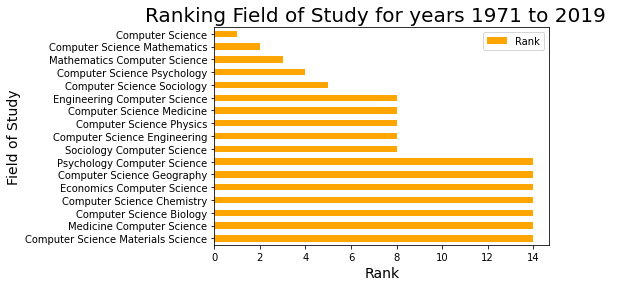

fieldsOfStudy
Computer Science                       1.0
Computer Science Mathematics           2.0
Mathematics Computer Science           3.0
Computer Science Psychology            4.0
Computer Science Sociology             5.0
Engineering Computer Science           8.0
Computer Science Medicine              8.0
Computer Science Physics               8.0
Computer Science Engineering           8.0
Sociology Computer Science             8.0
Psychology Computer Science           14.0
Computer Science Geography            14.0
Economics Computer Science            14.0
Computer Science Chemistry            14.0
Computer Science Biology              14.0
Medicine Computer Science             14.0
Computer Science Materials Science    14.0
dtype: float64

In [9]:
#analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Final_Table_1.csv") 
#analysis for fieldofstudy from all 1971 to 2019
data = pd.read_csv("Final_Table_1.csv") 
df1 = data.groupby('fieldsOfStudy').size()
df2 = df1.rank(ascending=0)
df3 = df2.sort_values(ascending=True)
print(df3)
df3.to_csv("field_of_study.csv", header=['Rank'])
data1 = data['fieldsOfStudy'].describe()
print(data1)

#data visulalization for field of study
plotgraph = pd.read_csv("field_of_study.csv")
plotgraph.set_index("fieldsOfStudy",drop=True,inplace=True)
ax = plotgraph.plot.barh(color = 'Orange')
ax.invert_yaxis()
plt.title("Ranking Field of Study for years 1971 to 2019  ",fontsize=20)
plt.xlabel("Rank",fontsize=14)
plt.ylabel("Field of Study",fontsize=14)
plt.show()
df3

In [0]:
#analysis for fieldofstudy from all 1971 to 1981
df1971to1981 = df[(df['Year'] == 1971) | (df['Year'] == 1978) | (df['Year'] == 1979) | (df['Year'] == 1980) | (df['Year'] == 1981)]
df1 = df1971to1981.groupby('fieldsOfStudy').size()
print(df1)
print()
data1 = df1971to1981['fieldsOfStudy'].describe()
print(data1)

fieldsOfStudy
Computer Science    66
dtype: int64

count                   66
unique                   1
top       Computer Science
freq                    66
Name: fieldsOfStudy, dtype: object


In [0]:
#analysis for fieldofstudy from all 1982 to 1986
df1982to1986 = df[(df['Year'] == 1982) | (df['Year'] == 1983) | (df['Year'] == 1984) | (df['Year'] == 1985) | (df['Year'] == 1986)]
df1 = df1982to1986.groupby('fieldsOfStudy').size()
print(df1)
print()
data1 = df1982to1986['fieldsOfStudy'].describe()
print(data1)

fieldsOfStudy
Computer Science    95
dtype: int64

count                   95
unique                   1
top       Computer Science
freq                    95
Name: fieldsOfStudy, dtype: object


In [0]:
#analysis for fieldofstudy from all 1987 to 1991
df1987to1991 = df[(df['Year'] == 1987) | (df['Year'] == 1988) | (df['Year'] == 1989) | (df['Year'] == 1990) | (df['Year'] == 1991)]
df1 = df1987to1991.groupby('fieldsOfStudy').size()
print(df1)
print()
data1 = df1987to1991['fieldsOfStudy'].describe()
print(data1)

fieldsOfStudy
Computer Science    168
dtype: int64

count                  168
unique                   1
top       Computer Science
freq                   168
Name: fieldsOfStudy, dtype: object


In [0]:
#analysis for fieldofstudy from all 1992 to 1996
df1992to1996 = df[(df['Year'] == 1992) | (df['Year'] == 1993) | (df['Year'] == 1994) | (df['Year'] == 1995) | (df['Year'] == 1996)]
df1 = df1992to1996.groupby('fieldsOfStudy').size()
print(df1)
print()
data1 = df1992to1996['fieldsOfStudy'].describe()
print(data1)

fieldsOfStudy
Computer Science             179
Computer Science Medicine      1
dtype: int64

count                  180
unique                   2
top       Computer Science
freq                   179
Name: fieldsOfStudy, dtype: object


In [0]:
#analysis for fieldofstudy from all 1997 to 2001
df1997to2001 = df[(df['Year'] == 1997) | (df['Year'] == 1998) | (df['Year'] == 1999) | (df['Year'] == 2000) | (df['Year'] == 2001)]
df1 = df1997to2001.groupby('fieldsOfStudy').size()
print(df1)
print()
data1 = df1997to2001['fieldsOfStudy'].describe()
print(data1)

fieldsOfStudy
Computer Science    354
dtype: int64

count                  354
unique                   1
top       Computer Science
freq                   354
Name: fieldsOfStudy, dtype: object


In [0]:
#analysis for fieldofstudy from all 2002 to 2006
df2002to2006 = df[(df['Year'] == 2002) | (df['Year'] == 2003) | (df['Year'] == 2004) | (df['Year'] == 2005) | (df['Year'] == 2006)]
df1 = df2002to2006.groupby('fieldsOfStudy').size()
print(df1)
print()
data1 = df2002to2006['fieldsOfStudy'].describe()
print(data1)

fieldsOfStudy
Computer Science              632
Computer Science Medicine       1
Computer Science Sociology      1
dtype: int64

count                  634
unique                   3
top       Computer Science
freq                   632
Name: fieldsOfStudy, dtype: object


In [0]:
#analysis for fieldofstudy from all 2007 to 2011
df2007to2011 = df[(df['Year'] == 2007) | (df['Year'] == 2008) | (df['Year'] == 2009) | (df['Year'] == 2010) | (df['Year'] == 2011)]
df1 = df2007to2011.groupby('fieldsOfStudy').size()
print(df1)
print()
data1 = df2007to2011['fieldsOfStudy'].describe()
print(data1)

fieldsOfStudy
Computer Science                      1053
Computer Science Biology                 1
Computer Science Chemistry               1
Computer Science Materials Science       1
Computer Science Mathematics             4
Computer Science Physics                 1
Computer Science Psychology              4
Computer Science Sociology               2
Engineering Computer Science             1
Mathematics Computer Science             1
Medicine Computer Science                1
Psychology Computer Science              1
Sociology Computer Science               2
dtype: int64

count                 1073
unique                  13
top       Computer Science
freq                  1053
Name: fieldsOfStudy, dtype: object


In [0]:
#analysis for fieldofstudy from all 2012 to 2016
df2012to2016 = df[(df['Year'] == 2012) | (df['Year'] == 2013) | (df['Year'] == 2014) | (df['Year'] == 2015) | (df['Year'] == 2016)]
df1 = df2012to2016.groupby('fieldsOfStudy').size()
print(df1)
print()
data1 = df2012to2016['fieldsOfStudy'].describe()
print(data1)


fieldsOfStudy
Computer Science                1092
Computer Science Geography         1
Computer Science Mathematics       2
Computer Science Physics           1
Economics Computer Science         1
Engineering Computer Science       1
Mathematics Computer Science       1
dtype: int64

count                 1099
unique                   7
top       Computer Science
freq                  1092
Name: fieldsOfStudy, dtype: object


In [0]:
#analysis for fieldofstudy from all 2017 to 2019
df2017to2019 = df[(df['Year'] == 2017) | (df['Year'] == 2018) | (df['Year'] == 2019)]
df1 = df2017to2019.groupby('fieldsOfStudy').size()
print(df1)
print()
data1 = df2017to2019['fieldsOfStudy'].describe()
print(data1)


fieldsOfStudy
Computer Science                747
Computer Science Engineering      2
Computer Science Mathematics     12
Mathematics Computer Science      3
dtype: int64

count                  764
unique                   4
top       Computer Science
freq                   747
Name: fieldsOfStudy, dtype: object


       Unnamed: 0               article_id  ...    Rank count
49             49    10.1145/511706.511717  ...     1.0   101
2421          204    10.1145/860435.860525  ...     2.0    79
1442         1442    10.1145/383952.384062  ...     3.0    57
1333         1333    10.1145/383952.383970  ...     4.0    52
2363          146    10.1145/860435.860505  ...     5.0    50
...           ...                      ...  ...     ...   ...
4811         2594  10.1145/1390334.1390499  ...  4101.5     1
4810         2593  10.1145/1390334.1390499  ...  4101.5     1
4809         2592  10.1145/1390334.1390499  ...  4101.5     1
4807         2590  10.1145/1390334.1390498  ...  4101.5     1
13517        2880  10.1145/3331184.3331424  ...  4101.5     1

[6200 rows x 8 columns]


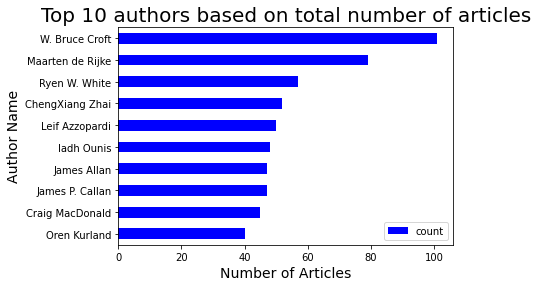

,name,count
49,W. Bruce Croft,101
2421,Maarten de Rijke,79
1442,Ryen W. White,57
1333,ChengXiang Zhai,52
2363,Leif Azzopardi,50
1171,Iadh Ounis,48
562,James Allan,47
630,James P. Callan,47
3663,Craig MacDonald,45
2596,Oren Kurland,40


In [2]:
#Auhor analysis and ranking the author based on the total number of articles written.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Final_Table_2.csv")
df['authorId'] = df['authorId'].fillna(0).astype(int)
df['count'] = df.groupby('name')['name'].transform('count')
df.drop_duplicates('name', inplace=True)
#df.nlargest(5, ['count'])[["name","authorId","count"]]
df1 = df.sort_values('count',ascending=False)
df1["Rank"] = df1["count"].rank(ascending=0)
print(df1)
df1 = df1.dropna(subset=['Rank'])
header = ["name", "authorId", "Rank"]
df1.to_csv('author_distribution.csv', columns = header)
plotgraph = pd.read_csv("author_distribution.csv")
plotgraph = df.nlargest(10, ['count'])[["name","count"]]

#Plotting a graph for top 10 authors with the maximum number of articles published.
plotgraph.set_index("name",drop=True,inplace=True)
ax=plotgraph.plot.barh(color = 'Blue')
ax.invert_yaxis()
plt.title("Top 10 authors based on total number of articles",fontsize=20)
plt.xlabel("Number of Articles",fontsize=14)
plt.ylabel("Author Name",fontsize=14)
plt.show()
plotgraph = df.nlargest(10, ['count'])[["name","count"]]
plotgraph

In [3]:
#topics for each year and ranking the years based on the number of topics for each year.
topics = pd.read_csv("Final_Table_1.csv")
topics['count'] = topics.groupby(['Year'])['topics'].transform('count')
topics.drop_duplicates('count', inplace=True)
#topics.nlargest(5, ['count'])[["topics","count"]]
topics1 = topics.sort_values('count',ascending=False)
topics1["Rank"] = topics1["count"].rank(ascending=0)
topics1 = topics1.dropna(subset=['Rank'])
header = ["Year", "topics", "Rank"]
topics1.to_csv('topic_distribution.csv', columns = header)
topicsplot = pd.read_csv("topic_distribution.csv") 
topics1.nlargest(10, ['count'])[["topics","Rank","Year"]]


,topics,Rank,Year
4172,"Information retrieval,Information access,Quest...",1.0,2019
3666,"Web search engine,Information retrieval,Comput...",2.0,2017
3921,"Natural language processing,Information seekin...",3.0,2018
2132,"Information retrieval,Heuristic (computer scie...",4.0,2011
3234,"Deep learning,Natural language processing,Natu...",5.0,2016
3006,"Web search engine,User modeling,Information re...",6.0,2014
1918,"Information retrieval,Experiment,Theory",7.0,2012
1495,"Query expansion,Personalized search,Informatio...",8.0,2007
2143,"Prototype,Cluster analysis,Categorization,Hier...",9.0,2010
2358,"Big data,Faceted classification,Feature extrac...",10.0,2013


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


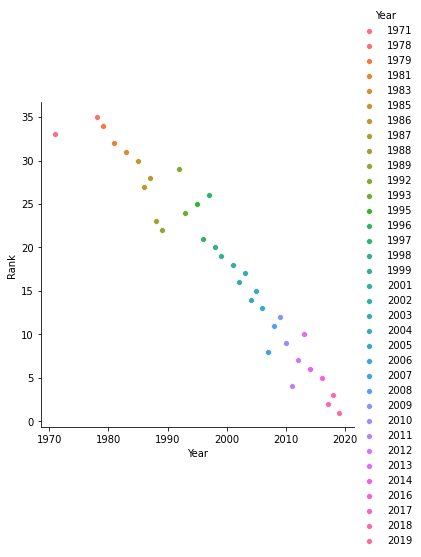

In [7]:
#Scatter plot for all maximum number of topics for each year.
import seaborn as sns
import pandas as pd
import numpy as np

sns.pairplot(x_vars=["Year"], y_vars=["Rank"], data=topicsplot, hue="Year", size=5)

In [0]:
#top most topic for articles from the year 1971 to 1981
df1971to1981 = df[(df['Year'] == 1971) | (df['Year'] == 1978) | (df['Year'] == 1979) | (df['Year'] == 1980) | (df['Year'] == 1981)]
df1971to1981['count'] = df1971to1981.groupby('topics')['topics'].transform('count')
df1971to1981.drop_duplicates('count', inplace=True)
df1971to1981.nlargest(1, ['count'])[["topics","count"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,topics,count
33,"Information retrieval,Euclidean distance,Docum...",2.0


In [0]:
#top most topic for articles from the year 1982 to 1986
df1982to1986 = df[(df['Year'] == 1982) | (df['Year'] == 1983) | (df['Year'] == 1984) | (df['Year'] == 1985) | (df['Year'] == 1986)]
df1982to1986['count'] = df1982to1986.groupby('topics')['topics'].transform('count')
df1982to1986.drop_duplicates('count', inplace=True)
df1982to1986.nlargest(1, ['count'])[["topics","count"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,topics,count
45,"Information retrieval,Semantic mapper,Term ind...",1


In [0]:
#top most topic for articles from the year 1987 to 1991
df1987to1991 = df[(df['Year'] == 1987) | (df['Year'] == 1988) | (df['Year'] == 1989) | (df['Year'] == 1990) | (df['Year'] == 1991)]
df1987to1991['count'] = df1987to1991.groupby('topics')['topics'].transform('count')
df1987to1991.drop_duplicates('count', inplace=True)
df1987to1991.nlargest(1, ['count'])[["topics","count"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,topics,count
185,Information retrieval,2.0


In [0]:
#top most topic for articles from the year 1992 to 1996
df1992to1996 = df[(df['Year'] == 1992) | (df['Year'] == 1993) | (df['Year'] == 1994) | (df['Year'] == 1995) | (df['Year'] == 1996)]
df1992to1996['count'] = df1992to1996.groupby('topics')['topics'].transform('count')
df1992to1996.drop_duplicates('count', inplace=True)
df1992to1996.nlargest(1, ['count'])[["topics","count"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,topics,count
346,Information retrieval,4.0


In [0]:
#top most topic for articles from the year 1997 to 2001
df1997to2001 = df[(df['Year'] == 1997) | (df['Year'] == 1998) | (df['Year'] == 1999) | (df['Year'] == 2000) | (df['Year'] == 2001)]
df1997to2001['count'] = df1997to2001.groupby('topics')['topics'].transform('count')
df1997to2001.drop_duplicates('count', inplace=True)
df1997to2001.nlargest(1, ['count'])[["topics","count"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,topics,count
531,"Information retrieval,Relevance,Precision and ...",2.0


In [0]:
#top most topic for articles from the year 2002 to 2006
df2002to2006 = df[(df['Year'] == 2002) | (df['Year'] == 2003) | (df['Year'] == 2004) | (df['Year'] == 2005) | (df['Year'] == 2006)]
df2002to2006['count'] = df2002to2006.groupby('topics')['topics'].transform('count')
df2002to2006.drop_duplicates('count', inplace=True)
df2002to2006.nlargest(1, ['count'])[["topics","count"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,topics,count
995,Query expansion,2.0


In [0]:
#top most topic for articles from the year 2007 to 2011
df2007to2011 = df[(df['Year'] == 2007) | (df['Year'] == 2008) | (df['Year'] == 2009) | (df['Year'] == 2010) | (df['Year'] == 2011)]
df2007to2011['count'] = df2007to2011.groupby('topics')['topics'].transform('count')
df2007to2011.drop_duplicates('count', inplace=True)
df2007to2011.nlargest(1, ['count'])[["topics","count"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,topics,count
1615,Web search engine,6.0


In [0]:
#top most topic for articles from the year 2012 to 2016
df2012to2016 = df[(df['Year'] == 2012) | (df['Year'] == 2013) | (df['Year'] == 2014) | (df['Year'] == 2015) | (df['Year'] == 2016)]
df2012to2016['count'] = df2012to2016.groupby('topics')['topics'].transform('count')
df2012to2016.drop_duplicates('count', inplace=True)
df2012to2016.nlargest(1, ['count'])[["topics","count"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,topics,count
2072,Information retrieval,3.0


In [0]:
#top most topic for articles from the year 2017 to 2019
df2017to2019 = df[(df['Year'] == 2017) | (df['Year'] == 2018) | (df['Year'] == 2019)]
df2017to2019['count'] = df2017to2019.groupby('topics')['topics'].transform('count')
df2017to2019.drop_duplicates('count', inplace=True)
df2017to2019.nlargest(1, ['count'])[["topics","count"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,topics,count
3908,"Text corpus,Probabilistic latent semantic anal...",2


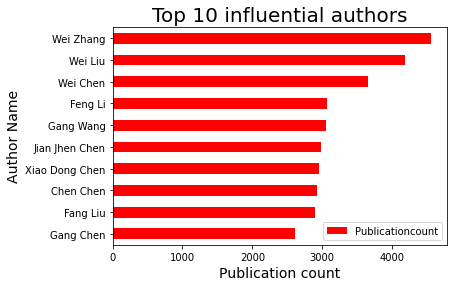

,Publicationcount
name,
Wei Zhang,4562.0
Wei Liu,4184.0
Wei Chen,3655.0
Feng Li,3067.0
Gang Wang,3053.0
Jian Jhen Chen,2985.0
Xiao Dong Chen,2952.0
Chen Chen,2928.0
Fang Liu,2899.0


In [6]:
#Most influential authors with the mean of publication count
authordf = pd.read_csv("Final_Table_2.csv")
authordf['authorId'] = authordf['authorId'].fillna(0).astype(int)
authordf.groupby('name')['Publicationcount'].mean()
authordf.drop_duplicates('Publicationcount', inplace=True)
#authordf.nlargest(5, ['Publicationcount'])[["name","Publicationcount"]]
authordf1 = authordf.sort_values('Publicationcount',ascending=False)
authordf1["Rank"] = authordf1["Publicationcount"].rank(ascending=0)
authordf1 = authordf1.dropna(subset=['Rank'])
header = ["name", "authorId", "Publicationcount","Rank"]
authordf1.to_csv('influential_authors.csv', columns = header)
authordf1

#plotting the top 10 influential authors.
plotgraph = authordf1.nlargest(10, ['Publicationcount'])[["name","Publicationcount"]]
plotgraph.set_index("name",drop=True,inplace=True)
ax = plotgraph.plot.barh(color = 'Red')
ax.invert_yaxis()
plt.title("Top 10 influential authors",fontsize=20)
plt.xlabel("Publication count",fontsize=14)
plt.ylabel("Author Name",fontsize=14)
plt.show()
plotgraph

In [0]:
#Reading the author table for data analysis
coauthordf = pd.read_csv("Final_Table_2.csv")
coauthordf['authorId'] = coauthordf['authorId'].fillna(0).astype(int)
coauthordf

,Unnamed: 0,article_id,authorId,name,url,Publicationcount,Rank
0,0,10.1145/511285.511286,1777876,Jack Minker,https://www.semanticscholar.org/author/1777876,252.0,1
1,1,10.1145/511285.511286,144890509,Sam Rosenfeld,https://www.semanticscholar.org/author/144890509,7.0,2
2,2,10.1145/511285.511288,2523724,Milos Pacak,https://www.semanticscholar.org/author/2523724,18.0,1
3,3,10.1145/511285.511288,2641020,Arnold W. Pratt,https://www.semanticscholar.org/author/2641020,48.0,2
4,4,10.1145/511285.511289,1401061734,Bozena Henisz-Dostert,https://www.semanticscholar.org/author/1401061734,13.0,1
...,...,...,...,...,...,...,...
13513,2876,10.1145/3331184.3331420,35684998,Marco Wrzalik,https://www.semanticscholar.org/author/35684998,4.0,1
13514,2877,10.1145/3331184.3331421,2691382,Alfan Farizki Wicaksono,https://www.semanticscholar.org/author/2691382,28.0,1
13515,2878,10.1145/3331184.3331422,3218037,Souvick Ghosh,https://www.semanticscholar.org/author/3218037,23.0,1
13516,2879,10.1145/3331184.3331423,49916704,Rodger Benham,https://www.semanticscholar.org/author/49916704,10.0,1


In [0]:
#Authors and co authors for all the articles.
group = coauthordf.groupby('article_id')
df2 = group.apply(lambda x: x['name'].unique())
df2 = df2.apply(pd.Series)
df2 = df2.replace(np.nan, '', regex=True)
df2.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
article_id,,,,,,,,,,,,,,,
10.1145/1008992.1008996,Chirag Shah,W. Bruce Croft,,,,,,,,,,,,,
10.1145/1008992.1008997,Einat Amitay,David Carmel,Ronny Lempel,Aya Soffer,,,,,,,,,,,
10.1145/1008992.1008998,Fernando Díaz,Rosie Jones,,,,,,,,,,,,,
10.1145/1008992.1009000,Chris Buckley,Ellen M. Voorhees,,,,,,,,,,,,,
10.1145/1008992.1009001,Mark Sanderson,Hideo Joho,,,,,,,,,,,,,
10.1145/1008992.1009002,Douglas W. Oard,Dagobert Soergel,David S. Doermann,Xiaoli Huang,G. Craig Murray,Jianqiang Wang,Bhuvana Ramabhadran,Martin Franz,Samuel Gustman,James Mayfield,Liliya Kharevych,Stephanie Strassel,,,
10.1145/1008992.1009004,Hui Fang,Tao Tao,ChengXiang Zhai,,,,,,,,,,,,
10.1145/1008992.1009005,Ji-Rong Wen,Ni Lao,Wei-Ying Ma,,,,,,,,,,,,
10.1145/1008992.1009006,Ramesh Nallapati,,,,,,,,,,,,,,
